<a href="https://colab.research.google.com/github/jae-yun/sc24x_ai17_jaeyun/blob/main/sc24x_ai17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy.stats import binom
import random
import scipy.stats as st
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats.distributions import uniform

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score

from wordcloud import WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
testdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (3)/test.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (3)/train.csv')

target = 'label'

train, val = train_test_split(
    df, train_size=0.8, test_size=0.2, random_state=42
)

X_train = train.text.reset_index(drop=True)
y_train = train[target].reset_index(drop=True)
X_val = val.text.reset_index(drop=True)
y_val = val[target].reset_index(drop=True)
X_test = testdf.text
y_test = testdf[target]

# https://www.kaggle.com/datasets/thedevastator/imdb-large-movie-review-dataset-binary-sentiment

In [3]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(2)} 입니다')

기준모델의 정확도는 0.5 입니다


In [22]:
# accuracy_score(y_val,pipe.predict(X_val)), f1_score(y_train, pipe.predict(X_train)), f1_score(y_val, pipe.predict(X_val))

In [5]:
pipe = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    PassiveAggressiveClassifier(max_iter = 1000, early_stopping=True, n_iter_no_change=5, random_state=42),
)

params = {
    "tfidfvectorizer__max_df": [0.5, 0.6, 0.7],
    "tfidfvectorizer__max_features": [60000, 30000, 15000, 7500, 5000, 1000, 500],
    "tfidfvectorizer__ngram_range" : [(1,1), (1,2), (1,3)]
}

grid_search = GridSearchCV(pipe, param_grid=params, scoring="f1", cv=3, verbose=3)
grid_search.fit(X_train, y_train)


print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 AUC: ", grid_search.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV 1/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 1);, score=0.869 total time=   4.4s
[CV 2/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 1);, score=0.873 total time=   4.1s
[CV 3/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 1);, score=0.866 total time=   5.5s
[CV 1/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 2);, score=0.884 total time=  15.2s
[CV 2/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 2);, score=0.883 total time=  13.7s
[CV 3/3] END tfidfvectorizer__max_df=0.5, tfidfvectorizer__max_features=60000, tfidfvectorizer__ngram_range=(1, 2);, score=0.877 total time=  14.5s
[CV 1/3] END tfidfvectorizer__max_df=0.5, tfidfvec

In [6]:
gresult = pd.DataFrame(grid_search.cv_results_)
gresult.to_csv('result.csv')

In [5]:
gresult = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (3)/result.csv')

In [6]:
select = ['mean_fit_time', 'mean_score_time', 'param_tfidfvectorizer__max_df', 'param_tfidfvectorizer__max_features','param_tfidfvectorizer__ngram_range', 'mean_test_score']
result = gresult[select]

result

mean_fit_time  mean_score_time  param_tfidfvectorizer__max_df  \
0        3.050391         1.615615                            0.5   
1       11.574554         2.916293                            0.5   
2       23.725309         3.307034                            0.5   
3        3.237245         1.467559                            0.5   
4       11.859205         2.007437                            0.5   
..            ...              ...                            ...   
58      12.395334         1.752271                            0.7   
59      24.131409         2.463730                            0.7   
60       3.092243         1.248415                            0.7   
61      12.417200         1.742335                            0.7   
62      23.947605         2.406452                            0.7   

    param_tfidfvectorizer__max_features param_tfidfvectorizer__ngram_range  \
0                                 60000                             (1, 1)   
1                                 60000                             (1, 2)   
2                                 60000                             (1, 3)   
3                                 30000                             (1, 1)   
4                                 30000                             (1, 2)   
..                                  ...                                ...   
58                                 1000                             (1, 2)   
59                                 1000                             (1, 3)   
60                                  500                             (1, 1)   
61                                  500                             (1, 2)   
62                                  500                             (1, 3)   

    mean_test_score  
0          0.869401  
1          0.881414  
2          0.881047  
3          0.867138  
4          0.874629  
..              ...  
58         0.834740  
59         0.835653  
60         0.811522  
61         0.807065  
62         0.804811  

[63 rows x 6 columns]

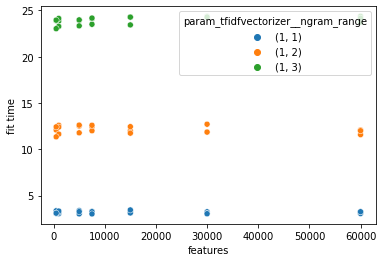

In [5]:
plt.figure()
sns.scatterplot(data=result, x="param_tfidfvectorizer__max_features", y='mean_fit_time', hue="param_tfidfvectorizer__ngram_range")
plt.xlabel('features')
plt.ylabel('fit time')
plt.show()

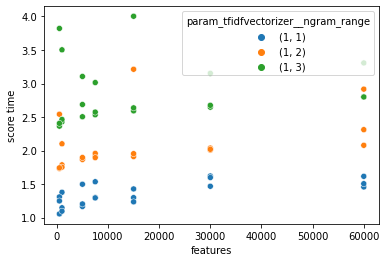

In [20]:
plt.figure()
sns.scatterplot(data=result, x="param_tfidfvectorizer__max_features", y='mean_score_time', hue="param_tfidfvectorizer__ngram_range")
plt.xlabel('features')
plt.ylabel('score time')
plt.show()

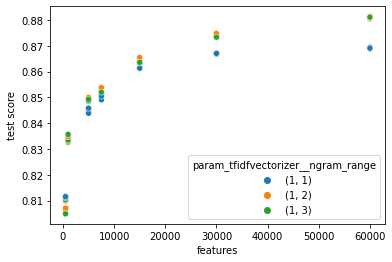

In [8]:
plt.figure()
sns.scatterplot(data=result, x="param_tfidfvectorizer__max_features", y="mean_test_score", hue="param_tfidfvectorizer__ngram_range")
plt.xlabel('features')
plt.ylabel('test score')
plt.show()

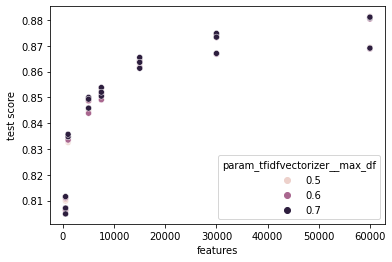

In [16]:
plt.figure()
sns.scatterplot(data=result, x="param_tfidfvectorizer__max_features", y="mean_test_score", hue="param_tfidfvectorizer__max_df")
plt.xlabel('features')
plt.ylabel('test score')
plt.show()

In [21]:
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.5, max_features = 60000, ngram_range=(1,2))

X_train_encoded = vectorizer.fit_transform(X_train)
X_val_encoded = vectorizer.transform(X_val)

pac = PassiveAggressiveClassifier(max_iter = 1000, early_stopping=True, n_iter_no_change=5, random_state=42)
pac.fit(X_train_encoded, y_train)

# Check Predict on the test set and calculate accuracy value
y_pred = pac.predict(X_val_encoded)
score = accuracy_score(y_val,y_pred)
print( 'Model Accuracy :', round(score*100,2) )
print("훈련 정확도: ", f1_score(y_train, pac.predict(X_train_encoded)))
print("검증 정확도: ", f1_score(y_val, pac.predict(X_val_encoded)))


Model Accuracy : 89.3
훈련 정확도:  0.9890680377377329
검증 정확도:  0.892764080978152


In [22]:
word_count = pd.DataFrame({
    'word': vectorizer.get_feature_names(),
    'tfidf': X_train_encoded.sum(axis=0).flat
})

word_count.sort_values('tfidf', ascending=False).head(20)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word       tfidf
30922        like  370.495628
28374        just  347.584591
22793        good  325.926006
50894       story  281.414862
43787      really  275.370764
53823        time  274.542111
3673          bad  256.048488
23462       great  239.955702
39992      people  231.844883
15110         don  227.779597
36822      movies  222.566435
57625       watch  206.624304
53386       think  202.072798
33133        make  197.835911
57970         way  196.858234
47553        seen  195.172650
899        acting  194.333971
9087   characters  192.685719
41204        plot  190.352167
20168       films  185.927395

In [12]:
tfidf_weights = [(word, X_train_encoded.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

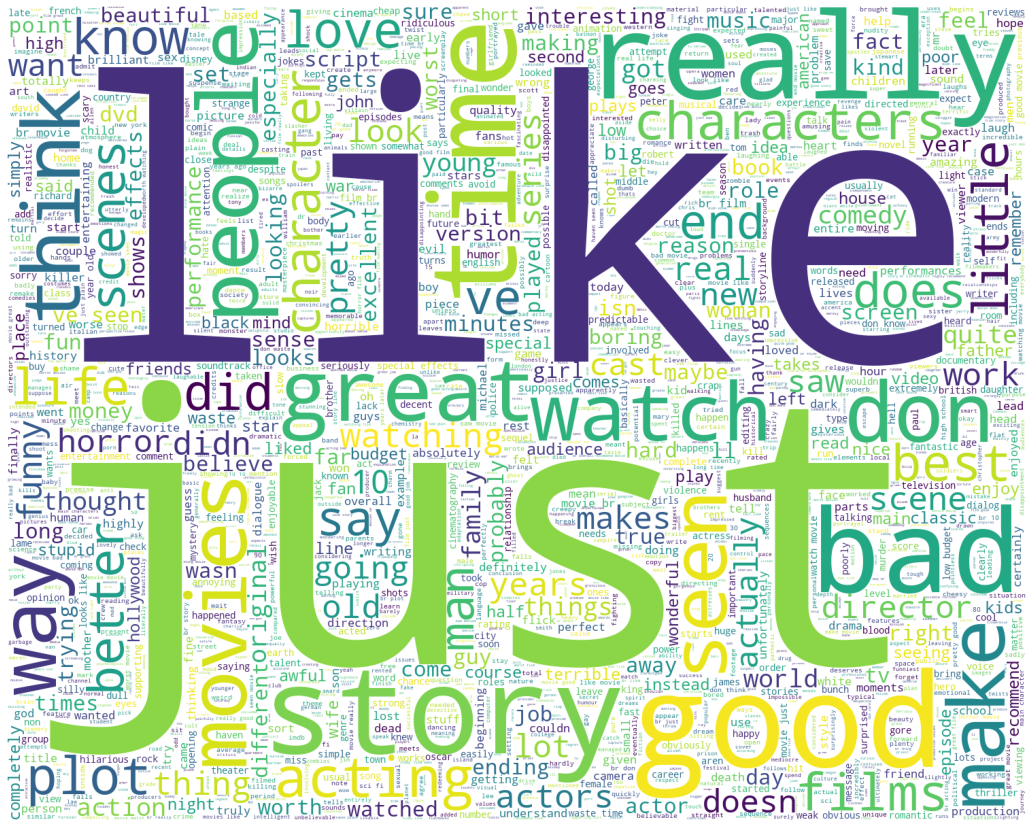

<Figure size 432x288 with 0 Axes>

In [16]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000)
w.fit_words(dict(tfidf_weights))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(w)
plt.show()
plt.savefig('wordcloud.png')

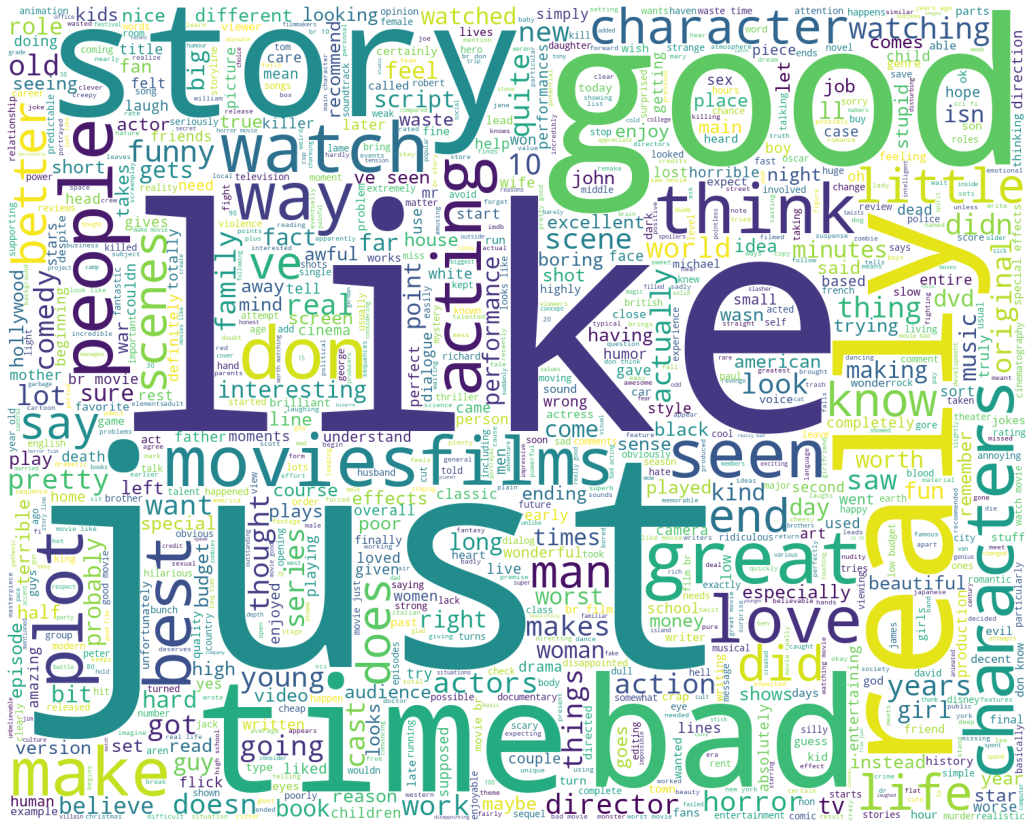

<Figure size 432x288 with 0 Axes>

In [17]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=1000)
w.fit_words(dict(tfidf_weights))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(w)
plt.show()
plt.savefig('wordcloud.png')

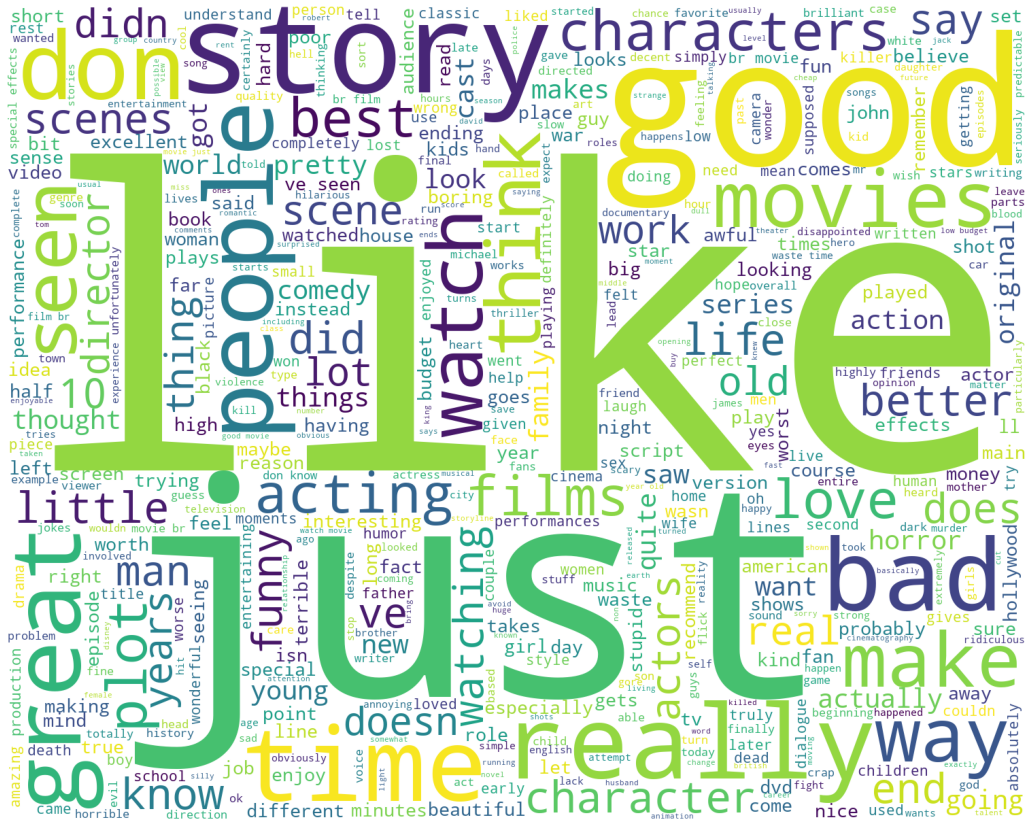

<Figure size 432x288 with 0 Axes>

In [18]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=500)
w.fit_words(dict(tfidf_weights))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(w)
plt.show()
plt.savefig('wordcloud.png')

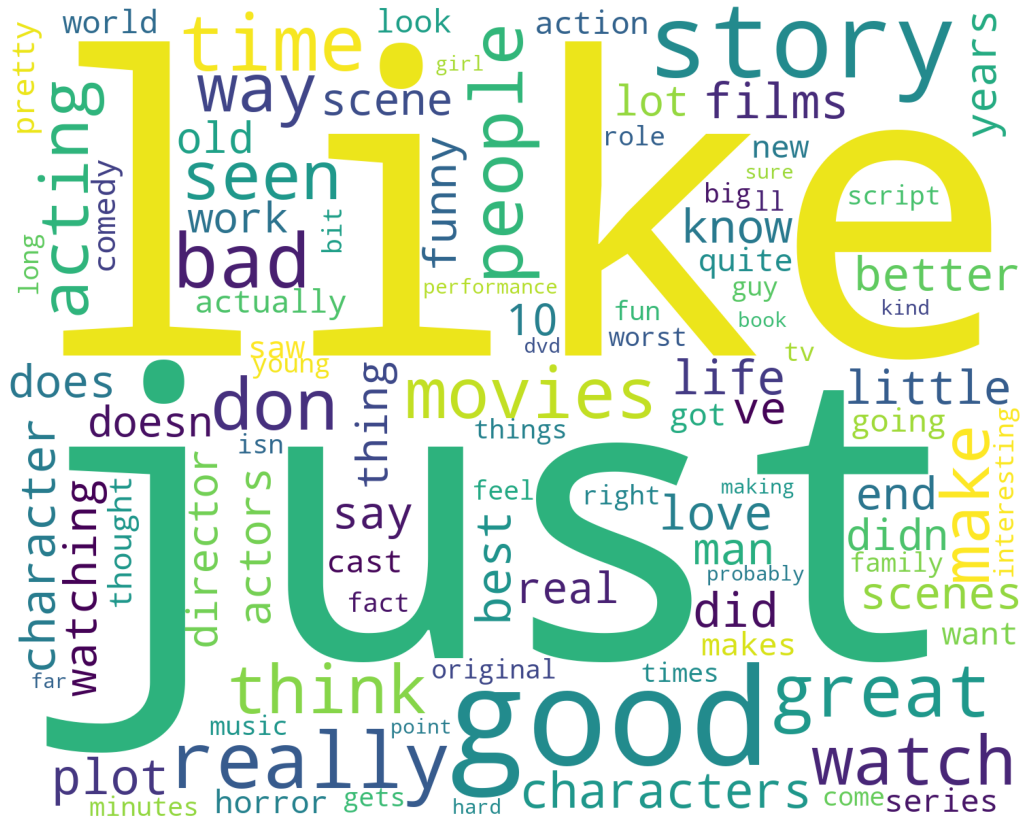

<Figure size 432x288 with 0 Axes>

In [19]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=100)
w.fit_words(dict(tfidf_weights))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(w)
plt.show()
plt.savefig('wordcloud.png')

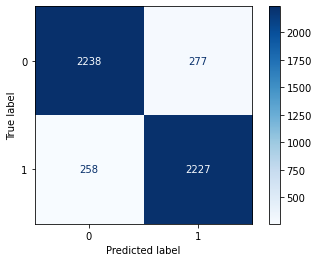

In [11]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

In [13]:
###Test Zone

X_test_encoded = vectorizer.transform(X_test)
y_result = pac.predict(X_test_encoded)
score = accuracy_score(y_test,y_result)
print( 'Model Accuracy :', round(score*100,2) )
print(" f1: ", f1_score(y_test, pac.predict(X_test_encoded)))


Model Accuracy : 86.41
 f1:  0.8626198083067093


In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.5, max_features = 500, ngram_range=(1,1))

X_train_encoded = vectorizer.fit_transform(X_train)
X_val_encoded = vectorizer.transform(X_val)

pac = PassiveAggressiveClassifier(max_iter = 1000, early_stopping=True, n_iter_no_change=5, random_state=42)
pac.fit(X_train_encoded, y_train)

# Check Predict on the test set and calculate accuracy value
y_pred = pac.predict(X_val_encoded)
score = accuracy_score(y_val,y_pred)
print( 'Model Accuracy :', round(score*100,2) )
print("훈련 정확도: ", f1_score(y_train, pac.predict(X_train_encoded)))
print("검증 정확도: ", f1_score(y_val, pac.predict(X_val_encoded)))

X_test_encoded = vectorizer.transform(X_test)
y_result = pac.predict(X_test_encoded)
score = accuracy_score(y_test,y_result)
print( 'Model Accuracy :', round(score*100,2) )
print(" f1: ", f1_score(y_test, pac.predict(X_test_encoded)))


Model Accuracy : 80.22
훈련 정확도:  0.8188247011952191
검증 정확도:  0.8024765328540043
Model Accuracy : 80.24
 f1:  0.8028410677945813
